# Book Chapter- 1

In [2]:
# Import Pandas and Numpy
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Set some pandas Properties 
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# And some items for matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

### The pandas Series object

In [3]:
s = Series([1,2,3,4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [4]:
s[1]

2

In [5]:
s[[1,3]]

1    2
3    4
dtype: int64

In [7]:
s= Series([1,2,3,4], index= ['a', 'b', 'c', 'd'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [8]:
s['a']

1

In [9]:
s[['a', 'b']]

a    1
b    2
dtype: int64

In [10]:
s[1]

2

In [11]:
s[[1,2]]

b    2
c    3
dtype: int64

In [12]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [14]:
dates = pd.date_range('2014-07-01', '2014-07-06')
dates

DatetimeIndex(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-05', '2014-07-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
# representing temperatures
temp1  = Series([80, 82, 85, 90, 83, 87],index= dates)
temp1

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, dtype: int64

In [16]:
temp1.mean()

84.5

In [18]:
temp2 = Series([70, 75, 69, 83, 79, 77],index = dates)
# and calculates the difference at those matching labels
temp_diffs = temp1 - temp2
temp_diffs

2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64

In [19]:
temp_diffs['2014-07']

2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64

In [20]:
temp_diffs['2014-07-03']

16

In [21]:
# and also possible by integer position as if the
# series was an array
temp_diffs[2]

16

In [25]:
temps_df = DataFrame({'Missoula': temp1,'Philadelphia': temp2})
temps_df

            Missoula  Philadelphia
2014-07-01        80            70
2014-07-02        82            75
2014-07-03        85            69
2014-07-04        90            83
2014-07-05        83            79
2014-07-06        87            77

In [26]:
temps_df['Missoula']

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, Name: Missoula, dtype: int64

In [28]:
# return both columns in a different order
temps_df[['Philadelphia', 'Missoula']]

            Philadelphia  Missoula
2014-07-01            70        80
2014-07-02            75        82
2014-07-03            69        85
2014-07-04            83        90
2014-07-05            79        83
2014-07-06            77        87

In [29]:
temps_df.Philadelphia

2014-07-01    70
2014-07-02    75
2014-07-03    69
2014-07-04    83
2014-07-05    79
2014-07-06    77
Freq: D, Name: Philadelphia, dtype: int64

In [30]:
# calculate the temperature difference between the two cities
temps_df.Missoula - temps_df.Philadelphia

2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64

In [32]:
# add a column to temp_df that contains the difference in temps
temps_df['Difference'] = temp_diffs
temps_df

            Missoula  Philadelphia  Difference
2014-07-01        80            70          10
2014-07-02        82            75           7
2014-07-03        85            69          16
2014-07-04        90            83           7
2014-07-05        83            79           4
2014-07-06        87            77          10

In [34]:
temps_df.columns

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [35]:
# slice the temp differences column for the rows at
# location 1 through 4 (as though it is an array)
temps_df.Difference[1:4]

2014-07-02     7
2014-07-03    16
2014-07-04     7
Freq: D, Name: Difference, dtype: int64

In [36]:
temps_df[1:4]

            Missoula  Philadelphia  Difference
2014-07-02        82            75           7
2014-07-03        85            69          16
2014-07-04        90            83           7

In [42]:
# temps_df['2014-07-02'] ## This will through an error as datafram can't be accessable 

In [38]:
temps_df.iloc[1]

Missoula        82
Philadelphia    75
Difference       7
Name: 2014-07-02 00:00:00, dtype: int64

In [43]:
# retrieve row by index label using .loc
temps_df.loc['2014-07-03']

Missoula        85
Philadelphia    69
Difference      16
Name: 2014-07-03 00:00:00, dtype: int64

In [47]:
temps_df.iloc[[1,2,3]].Difference

2014-07-02     7
2014-07-03    16
2014-07-04     7
Freq: D, Name: Difference, dtype: int64

In [51]:
temps_df.Missoula > 82

2014-07-01    False
2014-07-02    False
2014-07-03     True
2014-07-04     True
2014-07-05     True
2014-07-06     True
Freq: D, Name: Missoula, dtype: bool

In [53]:
temps_df['Missoula'] > 82

2014-07-01    False
2014-07-02    False
2014-07-03     True
2014-07-04     True
2014-07-05     True
2014-07-06     True
Freq: D, Name: Missoula, dtype: bool

In [55]:
temps_df[temps_df.Missoula > 82]

            Missoula  Philadelphia  Difference
2014-07-03        85            69          16
2014-07-04        90            83           7
2014-07-05        83            79           4
2014-07-06        87            77          10

In [60]:
url = "C://Users//t.shah//Desktop//TanujGit//ExploratoryDataAnalysis-EDA//DataSet//test1.csv"
df = pd.read_csv(url)
df

                  date         0         1         2
0  2000-01-01 00:00:00  1.103763 -1.909979 -0.808956
1  2000-01-02 00:00:00  1.188917  0.581120  0.861597
2  2000-01-03 00:00:00 -0.964200  0.779764  1.829062
3  2000-01-04 00:00:00  0.782130 -1.720670 -1.108242
4  2000-01-05 00:00:00 -1.867017 -0.528368 -2.488309
5  2000-01-06 00:00:00  2.569280 -0.471901 -0.835033
6  2000-01-07 00:00:00 -0.399323 -0.676427 -0.011256
7  2000-01-08 00:00:00  1.642993  1.013420  1.435667
8  2000-01-09 00:00:00  1.147308  2.138000  0.554171
9  2000-01-10 00:00:00  0.933766  1.387155 -0.560143

In [61]:
df.date

0    2000-01-01 00:00:00
1    2000-01-02 00:00:00
2    2000-01-03 00:00:00
3    2000-01-04 00:00:00
4    2000-01-05 00:00:00
5    2000-01-06 00:00:00
6    2000-01-07 00:00:00
7    2000-01-08 00:00:00
8    2000-01-09 00:00:00
9    2000-01-10 00:00:00
Name: date, dtype: object

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
date    10 non-null object
0       10 non-null float64
1       10 non-null float64
2       10 non-null float64
dtypes: float64(3), object(1)
memory usage: 400.0+ bytes


In [63]:
df.date[0]

'2000-01-01 00:00:00'

In [64]:
type(df.date[0])

str

In [65]:
url = "C://Users//t.shah//Desktop//TanujGit//ExploratoryDataAnalysis-EDA//DataSet//test1.csv"
df = pd.read_csv(url, parse_dates=['date'])
df

        date         0         1         2
0 2000-01-01  1.103763 -1.909979 -0.808956
1 2000-01-02  1.188917  0.581120  0.861597
2 2000-01-03 -0.964200  0.779764  1.829062
3 2000-01-04  0.782130 -1.720670 -1.108242
4 2000-01-05 -1.867017 -0.528368 -2.488309
5 2000-01-06  2.569280 -0.471901 -0.835033
6 2000-01-07 -0.399323 -0.676427 -0.011256
7 2000-01-08  1.642993  1.013420  1.435667
8 2000-01-09  1.147308  2.138000  0.554171
9 2000-01-10  0.933766  1.387155 -0.560143

In [66]:
type(df.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [67]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [70]:
# read in again, now specify the data column as being the
# index of the resulting DataFrame
df = pd.read_csv(url,
                    parse_dates=['date'],
                    index_col='date')
df

                   0         1         2
date                                    
2000-01-01  1.103763 -1.909979 -0.808956
2000-01-02  1.188917  0.581120  0.861597
2000-01-03 -0.964200  0.779764  1.829062
2000-01-04  0.782130 -1.720670 -1.108242
2000-01-05 -1.867017 -0.528368 -2.488309
2000-01-06  2.569280 -0.471901 -0.835033
2000-01-07 -0.399323 -0.676427 -0.011256
2000-01-08  1.642993  1.013420  1.435667
2000-01-09  1.147308  2.138000  0.554171
2000-01-10  0.933766  1.387155 -0.560143

In [71]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', name='date', freq=None)

In [90]:
'''Starting in 0.19.0, pandas no longer supports pandas.io.data or pandas.io.wb, 
so you must replace your imports from pandas.io with those from pandas_datareader:
'''

# imports for reading data from Yahoo!
from pandas_datareader import data
# from pandas.io.data import DataReader
# from pandas_datareader import data, web

from pandas_datareader import data as pdr
import fix_yahoo_finance


from datetime import date
from dateutil.relativedelta import relativedelta
# read the last three months of data for GOOG
goog = pdr.get_data_yahoo("GOOG",date.today() + relativedelta(months=-3))
# the result is a DataFrame
#and this gives us the 5 most recent prices
goog.tail()

                   High          Low         Open        Close   Volume  \
Date                                                                      
2019-05-13  1147.939941  1122.109985  1141.959961  1132.030029  1860600   
2019-05-14  1140.420044  1119.550049  1137.209961  1120.439941  1836600   
2019-05-15  1171.329956  1116.666016  1117.869995  1164.209961  2289300   
2019-05-16  1188.160034  1162.839966  1164.510010  1178.979980  1531400   
2019-05-17  1180.150024  1160.010010  1168.469971  1162.300049  1208100   

              Adj Close  
Date                     
2019-05-13  1132.030029  
2019-05-14  1120.439941  
2019-05-15  1164.209961  
2019-05-16  1178.979980  
2019-05-17  1162.300049  

In [91]:
goog.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [92]:
goog.index

DatetimeIndex(['2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28',
               '2019-03-01', '2019-03-04', '2019-03-05', '2019-03-06',
               '2019-03-07', '2019-03-08', '2019-03-11', '2019-03-12',
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-18',
               '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22',
               '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
               '2019-03-29', '2019-04-01', '2019-04-02', '2019-04-03',
               '2019-04-04', '2019-04-05', '2019-04-08', '2019-04-09',
               '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-15',
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-22',
               '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
               '2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02',
               '2019-05-03', '2019-05-06', '2019-05-07', '2019-05-08',
      

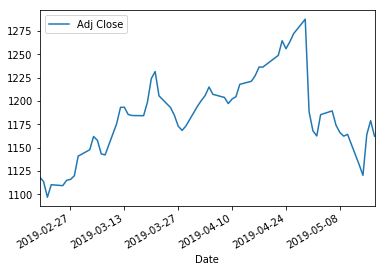

In [93]:
goog.plot(y = 'Adj Close')

In [94]:
import pandas as pd
pd.__version__

'0.24.2'

In [100]:
df = pd.DataFrame.from_items([('column1', [1, 2, 3])])
df

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


   column1
0        1
1        2
2        3

In [103]:
# a function that squares all the values
# in a sequence
def squares(values):
    result = []
    for v in values:
        result.append(v * v)
    return result
# create 100,000 numbers using python range
to_square = range(100000)
# time how long it takes to repeatedly square them all
%timeit squares(to_square)

10.4 ms ± 553 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [104]:
# now lets do this with a numpy array
array_to_square = np.arange(0, 100000)
# and time using a vectorized operation
%timeit array_to_square ** 2

69.3 µs ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [105]:
a1 = np.array([1,2,3,4,5])
a1

array([1, 2, 3, 4, 5])

In [106]:
type(a1)

numpy.ndarray

In [107]:
np.size(a1)

5

In [108]:
len(a1)

5

In [110]:
# any float in the sequences makes
# it an array of floats
a2 = np.array([1, 2, 3, 4.0, 5.0])
a2

array([1., 2., 3., 4., 5.])

In [112]:
a2.dtype

dtype('float64')

In [117]:
# shorthand to repeat a sequence 10 times
a3 = np.array([0]*10)
a3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [118]:
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [120]:
## above not the most efficient manner
np.zeros(10)
# force it to be of int instead of float64
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [125]:
# make "a range" starting at 0 and with 10 values
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [126]:
# 0 <= x < 10 increment by two
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [127]:
# 10 >= x > 0, counting down
np.arange(10, 0, -1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [128]:
# evenly spaced #'s between two intervals
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [133]:
# multiply numpy array by 2
a1 = np.arange(0, 10)
# add two numpy arrays
a2 = np.arange(10, 20)
a1+ a2

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [134]:
# create a 2-dimensional array (2x2)
np.array([[1,2], [3,4]])

array([[1, 2],
       [3, 4]])

In [136]:
# create a 1x20 array, and reshape to a 5x4 2d-array
m = np.arange(0, 20).reshape(5, 4)
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [137]:
np.size(m)

20

In [139]:
np.size(m, 0) # can ask the size along a given axis (0 is rows)

5

In [140]:
np.size(m, 1) # can ask the size along a given axis (1 is column)

4

In [141]:
a1[0], a2 [1]

(0, 11)

In [142]:
m.shape

(5, 4)

In [143]:
m.ndim

2

In [145]:
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [146]:
m[1,2]

6

In [147]:
m [1,:]

array([4, 5, 6, 7])

In [148]:
m [1,]

array([4, 5, 6, 7])

In [149]:
m[1]

array([4, 5, 6, 7])

In [150]:
m[:,2]

array([ 2,  6, 10, 14, 18])

In [152]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [153]:
a < 2

array([ True,  True, False, False, False])

In [155]:
(a<2) | (a>3)

array([ True,  True, False, False,  True])

In [156]:
a

array([0, 1, 2, 3, 4])

In [157]:
# create a function that is applied to all array elements
def exp (x):
    return x<3 or x>3
# np.vectorize applies the method to all items in an array
np.vectorize(exp)(a)

array([ True,  True,  True, False,  True])

In [160]:
np.sum(a > 3)

1

In [161]:
a

array([0, 1, 2, 3, 4])

In [163]:
# Arrays can also be compared to other arrays
# This can be applied across two arrays
a1 = np.arange(0, 5)
a2 = np.arange(5, 0, -1)
a1, a2

(array([0, 1, 2, 3, 4]), array([5, 4, 3, 2, 1]))

In [164]:
a1 < a2

array([ True,  True,  True, False, False])

In [165]:
# and even multi dimensional arrays
a1 = np.arange(9).reshape(3, 3)
a2 = np.arange(9, 0 , -1).reshape(3, 3)
a1 < a2

array([[ True,  True,  True],
       [ True,  True, False],
       [False, False, False]])

In [169]:
# get all items in the array from position 3
# up to position 8 (but not inclusive)
a1 = np.arange(1, 10)
a1, a1[3:8]

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([4, 5, 6, 7, 8]))

In [172]:
a1[::2]

array([1, 3, 5, 7, 9])

In [171]:
a1[::-1] # in reverse order

array([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [173]:
# note that when in reverse, this does not include
# that is, there is no 1 printed in this
a1[9:0:-1]  

array([9, 8, 7, 6, 5, 4, 3, 2])

In [174]:
# all items from position 5 onwards
a1[5:]

array([6, 7, 8, 9])

In [175]:
# the items in the first 5 positions
a1[:5]

array([1, 2, 3, 4, 5])

In [176]:
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [177]:
# we saw this earlier
# : in rows specifier means all rows
# so this gets items in column position 1, all rows
m[:,1]

array([ 1,  5,  9, 13, 17])

In [178]:
# in all rows, but for all columns in positions
# 1 up to but not including 3
m[:,1:3]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10],
       [13, 14],
       [17, 18]])

In [179]:
# in row positions 3 up to but not including 5, all columns
m[3:5,:]

array([[12, 13, 14, 15],
       [16, 17, 18, 19]])

In [180]:
# combined to pull out a sub matrix of the matrix
m[3:5,1:3]

array([[13, 14],
       [17, 18]])

In [181]:
# using a python array, we can select
# non-contiguous rows or columns
m[[1,3,4],:]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [188]:
# create a 9 element array (1x9)
a = np.arange(0, 9)
# and reshape to a 3x3 2-d array
m = a.reshape(3, 3)

In [190]:
# and we can reshape downward in dimensions too
reshaped = m.reshape(9)
reshaped, m

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]))

In [191]:
# .ravel will generate array representing a flattened 2-d array
raveled = m.ravel()
raveled, m

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]))

In [192]:
# but it will be a view into the source
# so items changed in the result of the ravel
# are changed in the original object
# reshape m to an array
reshaped = m.reshape(np.size(m))
# ravel into an array
raveled = m.ravel()
# change values in either
reshaped[2] = 1000
raveled[5] = 2000
# and they show as changed in the original
m

array([[   0,    1, 1000],
       [   3,    4, 2000],
       [   6,    7,    8]])

In [195]:
# flattened is like ravel, but a copy of the data,
# not a view into the source
m2 = np.arange(0, 9).reshape(3,3)
flattened = m2.flatten()
# change in the flattened object
flattened[0] = 1000
flattened
# but not in the original
m2 , flattened

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([1000,    1,    2,    3,    4,    5,    6,    7,    8]))

In [197]:
flattened.shape #The .shape property returns a tuple representing the shape of the array

(9,)

In [198]:
# and make it 3x3
flattened.shape = (3, 3)
# it is no longer flattened
flattened

array([[1000,    1,    2],
       [   3,    4,    5],
       [   6,    7,    8]])

In [199]:
# transpose a matrix
flattened.transpose()

array([[1000,    3,    6],
       [   1,    4,    7],
       [   2,    5,    8]])

In [200]:
# can also use .T property to transpose
flattened.T

array([[1000,    3,    6],
       [   1,    4,    7],
       [   2,    5,    8]])

In [201]:
# we can also use .resize, which changes shape of
# an object in-place
m = np.arange(0, 9).reshape(3,3)
m

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [203]:
m.resize(1,9)
m

array([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [204]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [207]:
b = (a+1) *10
b, a

(array([[10, 20, 30],
        [40, 50, 60],
        [70, 80, 90]]), array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]))

In [209]:
np.hstack((a,b))

array([[ 0,  1,  2, 10, 20, 30],
       [ 3,  4,  5, 40, 50, 60],
       [ 6,  7,  8, 70, 80, 90]])

In [210]:
np.vstack((a,b))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [212]:
np.concatenate((a,b))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [213]:
np.concatenate((a,b), axis = 0)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [214]:
np.concatenate((a,b), axis = 1)

array([[ 0,  1,  2, 10, 20, 30],
       [ 3,  4,  5, 40, 50, 60],
       [ 6,  7,  8, 70, 80, 90]])

In [215]:
np.dstack((a, b))

array([[[ 0, 10],
        [ 1, 20],
        [ 2, 30]],

       [[ 3, 40],
        [ 4, 50],
        [ 5, 60]],

       [[ 6, 70],
        [ 7, 80],
        [ 8, 90]]])

In [216]:
# set up 1-d array
one_d_a = np.arange(5)
one_d_a

array([0, 1, 2, 3, 4])

In [217]:
# another 1-d array
one_d_b = (one_d_a + 1) * 10
one_d_b

array([10, 20, 30, 40, 50])

In [218]:
np.column_stack((one_d_a, one_d_b))

array([[ 0, 10],
       [ 1, 20],
       [ 2, 30],
       [ 3, 40],
       [ 4, 50]])

In [219]:
# stack along rows
np.row_stack((one_d_a, one_d_b))

array([[ 0,  1,  2,  3,  4],
       [10, 20, 30, 40, 50]])

In [223]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [224]:
# horiz split the 2-d array into 4 array columns
np.hsplit(a, 4)

[array([[0],
        [4],
        [8]]), array([[1],
        [5],
        [9]]), array([[ 2],
        [ 6],
        [10]]), array([[ 3],
        [ 7],
        [11]])]

In [225]:
# horiz split into two array columns
np.hsplit(a, 2)

[array([[0, 1],
        [4, 5],
        [8, 9]]), array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [226]:
# split at columns 1 and 3
np.hsplit(a, [1, 3])

[array([[0],
        [4],
        [8]]), array([[ 1,  2],
        [ 5,  6],
        [ 9, 10]]), array([[ 3],
        [ 7],
        [11]])]

In [227]:
# along the rows
np.split(a, 2, axis = 1)

[array([[0, 1],
        [4, 5],
        [8, 9]]), array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [228]:
# new array for examples
a = np.arange(12).reshape(4, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [229]:
# split into four rows of arrays
np.vsplit(a, 4)

[array([[0, 1, 2]]),
 array([[3, 4, 5]]),
 array([[6, 7, 8]]),
 array([[ 9, 10, 11]])]

In [230]:
# into two rows of arrays
np.vsplit(a, 2)

[array([[0, 1, 2],
        [3, 4, 5]]), array([[ 6,  7,  8],
        [ 9, 10, 11]])]

In [231]:
# split along axis=0
# row 0 of original is row 0 of new array
# rows 1 and 2 of original are row 1
np.vsplit(a, [1, 3])

[array([[0, 1, 2]]), array([[3, 4, 5],
        [6, 7, 8]]), array([[ 9, 10, 11]])]

In [232]:
# split can specify axis
np.split(a, 2, axis = 0)

[array([[0, 1, 2],
        [3, 4, 5]]), array([[ 6,  7,  8],
        [ 9, 10, 11]])]

In [233]:
# 3-d array
c = np.arange(27).reshape(3, 3, 3)
c

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [234]:
# split into 3
np.dsplit(c, 3)

[array([[[ 0],
         [ 3],
         [ 6]],
 
        [[ 9],
         [12],
         [15]],
 
        [[18],
         [21],
         [24]]]), array([[[ 1],
         [ 4],
         [ 7]],
 
        [[10],
         [13],
         [16]],
 
        [[19],
         [22],
         [25]]]), array([[[ 2],
         [ 5],
         [ 8]],
 
        [[11],
         [14],
         [17]],
 
        [[20],
         [23],
         [26]]])]

In [240]:
# demonstrate some of the properties of NumPy arrays
m = np.arange(10, 19).reshape(3, 3)
print(m)


[[10 11 12]
 [13 14 15]
 [16 17 18]]


In [241]:
print ("{0} min of the entire matrix".format(m.min()))
print ("{0} max of entire matrix".format(m.max()))
print ("{0} position of the min value".format(m.argmin()))
print ("{0} position of the max value".format(m.argmax()))
print ("{0} mins down each column".format(m.min(axis = 0)))
print ("{0} mins across each row".format(m.min(axis = 1)))
print ("{0} maxs down each column".format(m.max(axis = 0)))
print ("{0} maxs across each row".format(m.max(axis = 1)))

10 min of the entire matrix
18 max of entire matrix
0 position of the min value
8 position of the max value
[10 11 12] mins down each column
[10 13 16] mins across each row
[16 17 18] maxs down each column
[12 15 18] maxs across each row


In [242]:
# demonstrate included statistical methods
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [243]:
a.mean(), a.std(), a.var()

(4.5, 2.8722813232690143, 8.25)

In [244]:
a = np.arange(1, 6)
a

array([1, 2, 3, 4, 5])

In [245]:
a.sum(), a.prod()

(15, 120)

In [247]:
a.cumsum() 

array([ 1,  3,  6, 10, 15], dtype=int32)

In [248]:
a.cumprod()

array([  1,   2,   6,  24, 120], dtype=int32)

In [249]:
# applying logical operators
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [250]:
(a<5).any()

True

In [251]:
(a<5).all()

False

In [253]:
np.size(a)

10

## Chapter 4. The pandas Series Object

In [254]:
# bring in NumPy and pandas
import numpy as np
import pandas as pd
# Set some pandas options for controlling output display
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [255]:
s1 = pd.Series(2)
s1

0    2
dtype: int64

In [256]:
# get value with label 0
s1[0]

2

In [259]:
# create a series of multiple items from a list
s2 = pd.Series([1, 22, 3, 4, 5])
s2

0     1
1    22
2     3
3     4
4     5
dtype: int64

In [260]:
s2.values

array([ 1, 22,  3,  4,  5], dtype=int64)

In [261]:
s2.index

RangeIndex(start=0, stop=5, step=1)

In [262]:
s1, s2

(0    2
 dtype: int64, 0     1
 1    22
 2     3
 3     4
 4     5
 dtype: int64)

In [263]:
# explicitly create an index
# index is alpha, not integer
s3 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s3

a    1
b    2
c    3
dtype: int64

In [265]:
s3.index

Index(['a', 'b', 'c'], dtype='object')

In [269]:
s3['c']

3

In [270]:
# create Series from an existing index
# scalar value with be copied at each index label
s4 = pd.Series(2, index=s2.index)
s4

0    2
1    2
2    2
3    2
4    2
dtype: int64

In [271]:
s2.index

RangeIndex(start=0, stop=5, step=1)

In [286]:
# generate a Series from 5 normal random numbers
np.random.seed(12345)
pd.Series(np.random.randn(5))

0   -0.204708
1    0.478943
2   -0.519439
3   -0.555730
4    1.965781
dtype: float64

In [287]:
# 0 through 9
pd.Series(np.linspace(0, 9, 10))

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [288]:
# 0 through 8
pd.Series(np.arange(0, 9))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
dtype: int32

In [289]:
s6 = pd.Series({'a': 1, 'b': 2, 'c': 3, 'd': 4})
s6

a    1
b    2
c    3
d    4
dtype: int64

In [290]:
# example series, which also contains a NaN
s = pd.Series([0, 1, 1, 2, 3, 4, 5, 6, 7, np.nan])
s

0    0.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    6.0
8    7.0
9    NaN
dtype: float64

In [291]:
len(s)

10

In [292]:
np.size(s)

10

In [294]:
s.size

10

In [295]:
s.shape

(10,)

In [296]:
# count() returns the number of non-NaN values
s.count()

9

In [297]:
s.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7., nan])

In [298]:
s.value_counts()

1.0    2
7.0    1
6.0    1
5.0    1
4.0    1
3.0    1
2.0    1
0.0    1
dtype: int64

In [300]:
# first five
s.head()
# first three
s.head(n = 3) # s.head(3) is equivalent
s.tail()
# last 3
s.tail(n = 3) # equivalent to s.tail(3)

7    6.0
8    7.0
9    NaN
dtype: float64

In [301]:
s

0    0.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    6.0
8    7.0
9    NaN
dtype: float64

In [303]:
s.take([0, 3, 9])  # The .take() method will return the rows in a series that correspond to the zero-based
# positions specified in a list:

0    0.0
3    2.0
9    NaN
dtype: float64

In [304]:
# single item lookup
s3['a']

1

In [305]:
s3

a    1
b    2
c    3
dtype: int64

In [306]:
s3[1]

2

In [307]:
s3[['a', 'b']]

a    1
b    2
dtype: int64

In [308]:
# series with an integer index, but not starting with 0
s5 = pd.Series([1, 2, 3], index=[10, 11, 12])
s5

10    1
11    2
12    3
dtype: int64

In [311]:
s5[10]

1

In [315]:
s5.loc[11]

2

In [316]:
s5.iloc[1]

2

In [317]:
# multiple items by label (loc)
s5.loc[[12, 10]]

12    3
10    1
dtype: int64

In [318]:
# multiple items by location / position (iloc)
s5.iloc[[0, 2]]

10    1
12    3
dtype: int64

In [319]:
s3

a    1
b    2
c    3
dtype: int64

In [320]:
s6 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s7 = pd.Series([4, 3, 2, 1], index=['d', 'c', 'b', 'a'])
# add them
s6 + s7

a    2
b    4
c    6
d    8
dtype: int64

In [322]:
# see how different from adding numpy arrays
a1 = np.array([1, 2, 3, 4])
a2 = np.array([4, 3, 2, 1])
a1 + a2

array([5, 5, 5, 5])

In [323]:
s3 *2

a    2
b    4
c    6
dtype: int64

In [325]:
# scalar series using s3's index
t = pd.Series(2, s3.index)
t

a    2
b    2
c    2
dtype: int64

In [326]:
s3

a    1
b    2
c    3
dtype: int64

In [327]:
s3 *t 

a    2
b    4
c    6
dtype: int64

In [330]:
# going to add this to s11
s10 = pd.Series([1.0, 2.0, 3.0], index=['a', 'a', 'b'])
# going to add this to s10
s11 = pd.Series([4.0, 5.0, 6.0], index=['a', 'a', 'c'])


In [331]:
s10 + s11

a    5.0
a    6.0
a    6.0
a    7.0
b    NaN
c    NaN
dtype: float64

In [332]:
# mean of numpy array values
nda = np.array([1, 2, 3, 4, 5])
nda.mean()

3.0

In [333]:
# mean of numpy array values with a NaN
nda = np.array([1, 2, 3, 4, np.NaN])
nda.mean()

nan

In [334]:
# ignores NaN values
s = pd.Series(nda)
s.mean()

2.5

In [335]:
# which rows have values that are > 5?
s = pd.Series(np.arange(0, 10))
s > 5

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9     True
dtype: bool

In [337]:
# sample series of five items
s = pd.Series(np.random.randn(5))
# change the index
s.index = ['a', 'b', 'c', 'd', 'e']
s

a    1.007189
b   -1.296221
c    0.274992
d    0.228913
e    1.352917
dtype: float64

In [338]:
# concat copies index values verbatim,
# potentially making duplicates
np.random.seed(123456)
s1 = pd.Series(np.random.randn(3))
s2 = pd.Series(np.random.randn(3))
combined = pd.concat([s1, s2])
combined

0    0.469112
1   -0.282863
2   -1.509059
0   -1.135632
1    1.212112
2   -0.173215
dtype: float64

In [341]:
combined.index = np.arange(0,len(combined))
combined

0    0.469112
1   -0.282863
2   -1.509059
3   -1.135632
4    1.212112
5   -0.173215
dtype: float64

In [345]:
np.random.seed(123456)
s1 = pd.Series(np.random.randn(4), ['a', 'b', 'c', 'd'])
# reindex with different number of labels
# results in dropped rows and/or NaN's
s2 = s1.reindex(['a', 'c', 'g'])
s2

a    0.469112
c   -1.509059
g         NaN
dtype: float64

In [346]:
s1

a    0.469112
b   -0.282863
c   -1.509059
d   -1.135632
dtype: float64

In [347]:
# s2 is a different Series than s1
s2['a'] = 0
s2

a    0.000000
c   -1.509059
g         NaN
dtype: float64

In [348]:
# this did not modify s1
s1

a    0.469112
b   -0.282863
c   -1.509059
d   -1.135632
dtype: float64

In [349]:
# different types for the same values of labels
# causes big trouble
s1 = pd.Series([0, 1, 2], index=[0, 1, 2])
s2 = pd.Series([3, 4, 5], index=['0', '1', '2'])
s1 + s2

0   NaN
1   NaN
2   NaN
0   NaN
1   NaN
2   NaN
dtype: float64

1. pandas first tries to align by the indexes and finds no matches, so it copies the index labels from the first series and tries to append the indexes from the second series.
2. However, since they are a different type, it defaults back to a zero-based integer sequence that results in duplicate values.
3. Finally, all values are NaN because the operation tries to add the item in the first series with the integer label 0, which has a value of 0, but can’t find the item in the other series and therefore, the result is NaN (and this fails six times in this case).

In [353]:
s2.index.values.astype(int)

array([0, 1, 2])

In [356]:
# reindex by casting the label types
# and we will get the desired result
s2.index = s2.index.values.astype(int)
s1 + s2

0    3
1    5
2    7
dtype: int64

In [360]:
# fill with 0 instead of NaN
s2 = s.copy()
s2.reindex(['a', 'f'], fill_value=0)

a    1.007189
f    0.000000
dtype: float64

In [363]:
s3 = pd.Series(['red', 'green', 'blue'], index=[0, 3, 5])
s3

0      red
3    green
5     blue
dtype: object

In [367]:
s3.reindex(np.arange(0,7))

0      red
1      NaN
2      NaN
3    green
4      NaN
5     blue
6      NaN
dtype: object

In [368]:
s3.reindex(np.arange(0,7), method='ffill')

0      red
1      red
2      red
3    green
4    green
5     blue
6     blue
dtype: object

In [369]:
# generate a Series to play with
np.random.seed(123456)
s = pd.Series(np.random.randn(3), index=['a', 'b', 'c'])
s

a    0.469112
b   -0.282863
c   -1.509059
dtype: float64

In [373]:
# change a value in the Series
# this is done in-place
# a new Series is not returned that has a modified value
s['d'] = 100
s


a      0.469112
b     -0.282863
c     -1.509059
d    100.000000
dtype: float64

In [374]:
# modify the value at 'd' in-place
s['d'] = -100
s

a      0.469112
b     -0.282863
c     -1.509059
d   -100.000000
dtype: float64

In [375]:
# remove a row / item
del(s['a'])
s

b     -0.282863
c     -1.509059
d   -100.000000
dtype: float64

In [376]:
# a Series to use for slicing
# using index labels not starting at 0 to demonstrate
# position based slicing
s = pd.Series(np.arange(100, 110), index=np.arange(10, 20))
s

10    100
11    101
12    102
13    103
14    104
15    105
16    106
17    107
18    108
19    109
dtype: int32

In [377]:
# items at position 0, 2, 4
s[0:6:2]

10    100
12    102
14    104
dtype: int32

In [378]:
s.iloc[0:6:2]

10    100
12    102
14    104
dtype: int32

In [380]:
s.loc[10:16:2]

10    100
12    102
14    104
16    106
dtype: int32

In [381]:
copy = s.copy() # preserve s
slice = copy[:2] # slice with first two rows
slice

10    100
11    101
dtype: int32

In [382]:
copy

10    100
11    101
12    102
13    103
14    104
15    105
16    106
17    107
18    108
19    109
dtype: int32

In [383]:
# change item with label 10 to 1000
slice[11] = 1000
# and see it in the source
copy

10     100
11    1000
12     102
13     103
14     104
15     105
16     106
17     107
18     108
19     109
dtype: int32

In [384]:
s

10    100
11    101
12    102
13    103
14    104
15    105
16    106
17    107
18    108
19    109
dtype: int32